Latencia média =  24.402769257154407


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

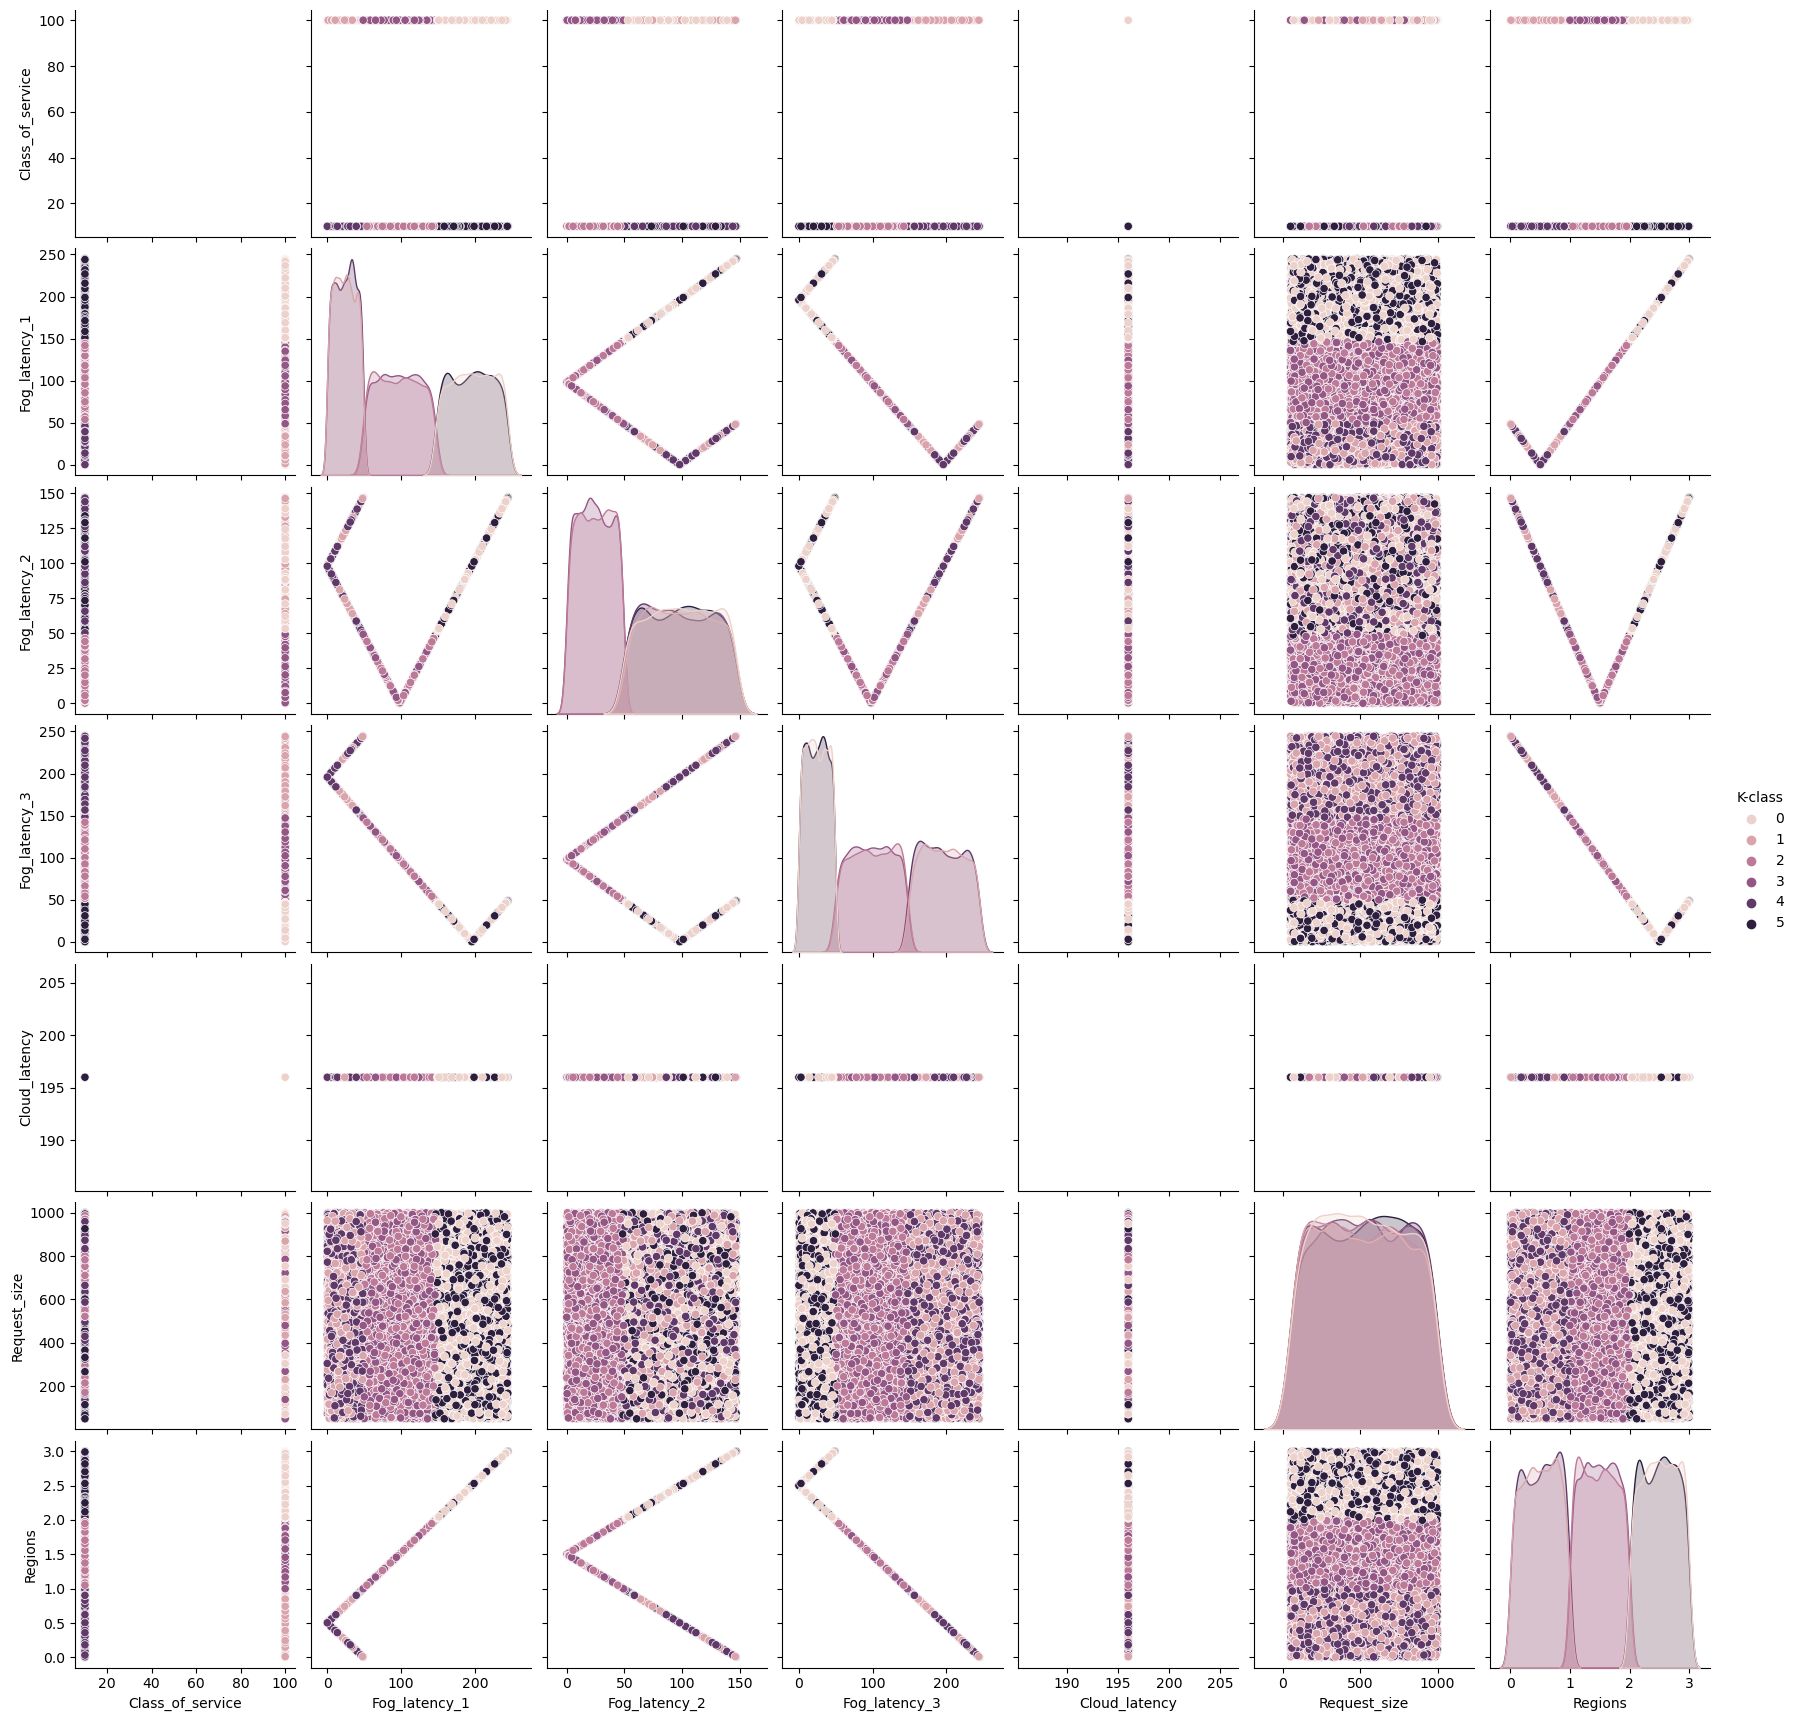

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload2.json')
data = json.load(f)



for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  9
quantidade dispositivos standard =  9
Menor latencia media =  14.23143880113486
latencia média por prioridade =  112.23143880113486
Horário =  1
quantidade dispositivos prioritarios =  18
quantidade dispositivos standard =  18
Menor latencia media =  9.52777651248243
latencia média por prioridade =  107.52777651248243
Horário =  2
quantidade dispositivos prioritarios =  35
quantidade dispositivos standard =  35
Menor latencia media =  13.31923428404596
latencia média por prioridade =  111.31923428404595
Horário =  3
quantidade dispositivos prioritarios =  63
quantidade dispositivos standard =  64
Menor latencia media =  12.248795222446692
latencia média por prioridade =  111.02044876575378
Horário =  4
quantidade dispositivos prioritarios =  108
quantidade dispositivos standard =  108
Menor latencia media =  12.857667535041973
latencia média por 

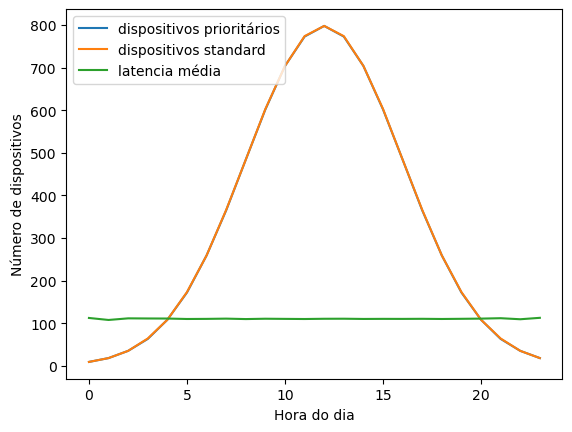

In [58]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [59]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                #fog_node_id = "Fog_latency_" + str(region+1)
                #latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #if devices_regions[region][index]["Class_of_service"] == 100:
                #    latency_by_priority += devices_regions[region][index]["standard_latency"]
                #else:
                #    standard_latency += devices_regions[region][index]["standard_latency"]
                #num_standard += 1

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"]
                else:
                    latency_by_priority += devices[fog_node_id]
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"]
                else:
                    standard_latency += devices[fog_node_id]
    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [60]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                # search for no_priority device connected to fog node
                non_priority_in_fog = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_in_fog = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)

                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                # if no no-priority device is found, just connect to the cloud
                if non_priority_in_fog == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"]
                else:
                    latency_by_priority += devices[fog_node_id]
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"]
                else:
                    standard_latency += devices[fog_node_id]

    print("numero prioritarios: ", num_priority)
    print("numero standard: ", num_standard)
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [95]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                #num_priority += 1
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node  
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                
                # if no no-priority device is found, just connect to the cloud
                if non_priority_processing == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])
                    #cloud_latency += devices_regions[region][index]["Cloud_latency"] + (len(processing_nodes[-1].queue_devices) * 100)
                    #num_standard += 1

    count_devices = 0
    for devices in processing_nodes[-1].connected_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            latency_by_priority += devices["Cloud_latency"]
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_latency += devices["Cloud_latency"]

    for devices in processing_nodes[-1].queue_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            count_devices += 1
            latency_by_priority += devices["Cloud_latency"] + (count_devices * 100)
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            count_devices += 1
            standard_latency += devices["Cloud_latency"] + (count_devices * 100)

    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [62]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    cloud_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                cloud_latency += devices_regions[region][index][fog_node_id] + (len(processing_nodes[region].queue_devices) * 100)

                #num_standard += 1
    
    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
            else:
                num_standard += 1

    return latency_by_priority, cloud_latency, num_priority, num_standard

### Clustering and getting ready for alocation processes

In [63]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.15829463803055344, 0), (0.614644861060027, 3), (0.931344466279215, 4), (1.433437671385992, 1), (1.9129920230840736, 5), (2.3381795046982985, 2)]
Horário =  1
[(0.47183621255844166, 1), (0.6362913583005736, 3), (1.5213718510864491, 2), (1.6058879868976763, 4), (2.0172038183959895, 5), (2.646794736238384, 0)]
Horário =  2
[(0.46124544460231687, 5), (0.6367858353131896, 0), (1.3421184281406884, 2), (1.6454689005909242, 3), (2.3910929834234245, 4), (2.621548360492448, 1)]
Horário =  3
[(0.33892877512342356, 5), (0.35626283667838043, 3), (1.1420167045062475, 4), (1.5302073723485798, 0), (2.4403549613657365, 1), (2.538051840222024, 2)]
Horário =  4
[(0.4731257049814974, 2), (0.5525032744933489, 5), (1.460076187814034, 0), (1.5569657063480913, 3), (2.454988533994577, 4), (2.575545023648259, 1)]
Horário =  5
[(0.5062662535602818, 3), (0.584936523656908, 0), (1.6321451889490295, 4), (1.683053

### Alocation by priority

Hour:  0
Latency by priority:  342.4083729030013  num_priority:  9
Latencia media:  38.04537476700014
Latency cloud:  1764  num_standard:  9
Latencia standard media:  196.0
Hour:  1
Latency by priority:  342.9999544493674  num_priority:  18
Latencia media:  19.055553024964855
Latency cloud:  3528  num_standard:  18
Latencia standard media:  196.0
Hour:  2
Latency by priority:  962.1570683230334  num_priority:  35
Latencia media:  27.490201952086668
Latency cloud:  6860  num_standard:  35
Latencia standard media:  196.0
Hour:  3
Latency by priority:  1563.4547060742264  num_priority:  63
Latencia media:  24.81674136625756
Latency cloud:  12544  num_standard:  64
Latencia standard media:  196.0
Hour:  4
Latency by priority:  2784.768668605538  num_priority:  108
Latencia media:  25.784895079680908
Latency cloud:  21168  num_standard:  108
Latencia standard media:  196.0
Hour:  5
Latency by priority:  4027.8185822190712  num_priority:  172
Latencia media:  23.417549896622507
Latency cloud

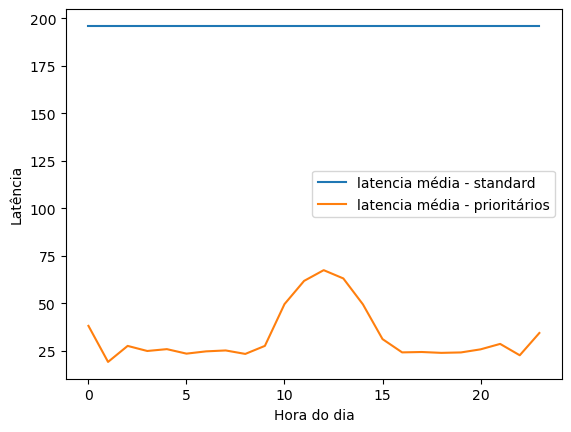

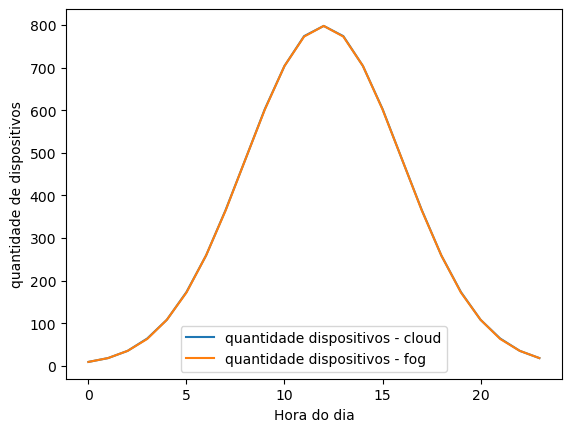

In [64]:
latency_list_fog_by_priority = []
latency_list_cloud_by_priority = []
all_devices_latency_mean_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    latency_list_fog_by_priority.append(media_priority_latency)
    latency_list_cloud_by_priority.append(media_cloud_latency)
    all_devices_latency_mean_by_priority.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - cloud', 'quantidade dispositivos - fog'])
pl.show()

### Alocation - Fog First

Hour:  0
numero prioritarios:  9
numero standard:  9
Latencia media prioritarios:  38.04537476700014
Latencia media standard:  24.678173900248314
Hour:  1
numero prioritarios:  18
numero standard:  18
Latencia media prioritarios:  19.055553024964855
Latencia media standard:  26.421371253012286
Hour:  2
numero prioritarios:  35
numero standard:  35
Latencia media prioritarios:  27.490201952086668
Latencia media standard:  26.323547779312268
Hour:  3
numero prioritarios:  63
numero standard:  64
Latencia media prioritarios:  24.81674136625756
Latencia media standard:  29.25364480104069
Hour:  4
numero prioritarios:  108
numero standard:  108
Latencia media prioritarios:  25.784895079680908
Latencia media standard:  25.535703229875153
Hour:  5
numero prioritarios:  172
numero standard:  173
Latencia media prioritarios:  23.417549896622507
Latencia media standard:  27.146983751150213
Hour:  6
numero prioritarios:  259
numero standard:  259
Latencia media prioritarios:  24.616633825971245
L

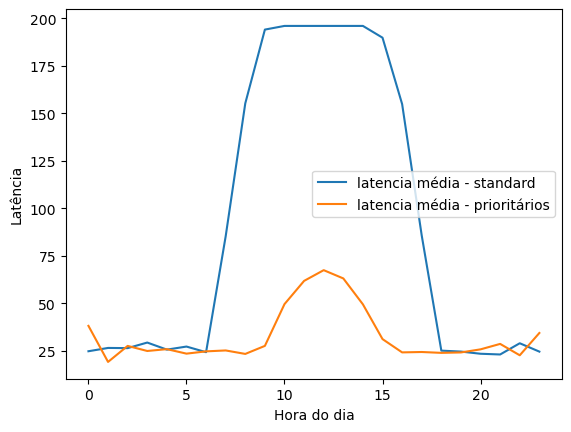

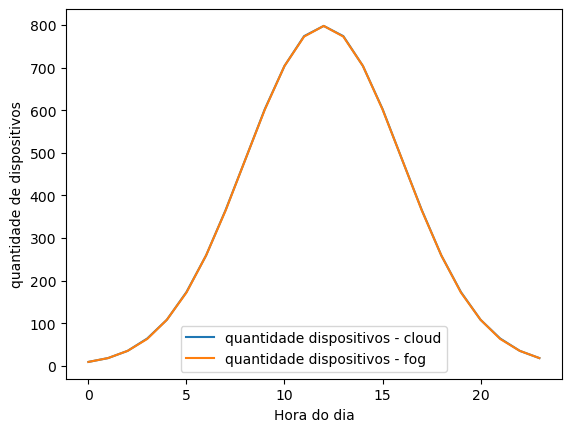

In [65]:
latency_list_fog_fog_first = []
latency_list_cloud_fog_first = []
all_devices_latency_mean_fog_first = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, cloud_latency, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    #if num_standard == 0:
    #    media_cloud_latency = 0
    #else:
    media_cloud_latency = cloud_latency / num_standard
        
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latencia media prioritarios: ", media_priority_latency)
    print("Latencia media standard: ", media_cloud_latency)
    latency_list_fog_fog_first.append(media_priority_latency)
    latency_list_cloud_fog_first.append(media_cloud_latency)
    all_devices_latency_mean_fog_first.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - cloud', 'quantidade dispositivos - fog'])
pl.show()

### Alocation - Only Cloud

Hour:  0
Latency by priority:  1764  num_priority:  9
Latencia media:  196.0
Latency cloud:  1764  num_standard:  9
Latencia standard media:  196.0
Latencia media:  196.0
Hour:  1
Latency by priority:  3528  num_priority:  18
Latencia media:  196.0
Latency cloud:  3528  num_standard:  18
Latencia standard media:  196.0
Latencia media:  196.0
Hour:  2
Latency by priority:  6860  num_priority:  35
Latencia media:  196.0
Latency cloud:  6860  num_standard:  35
Latencia standard media:  196.0
Latencia media:  196.0
Hour:  3
Latency by priority:  12348  num_priority:  63
Latencia media:  196.0
Latency cloud:  12544  num_standard:  64
Latencia standard media:  196.0
Latencia media:  196.0
Hour:  4
Latency by priority:  21168  num_priority:  108
Latencia media:  196.0
Latency cloud:  21168  num_standard:  108
Latencia standard media:  196.0
Latencia media:  196.0
Hour:  5
Latency by priority:  33712  num_priority:  172
Latencia media:  196.0
Latency cloud:  33908  num_standard:  173
Latencia 

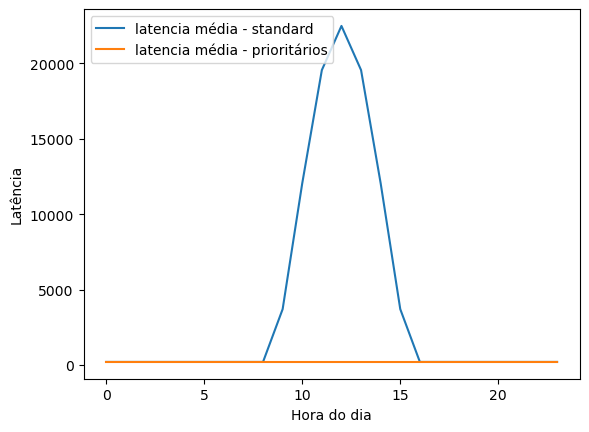

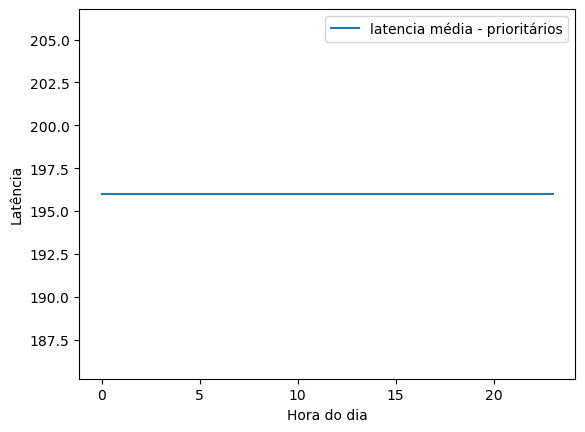

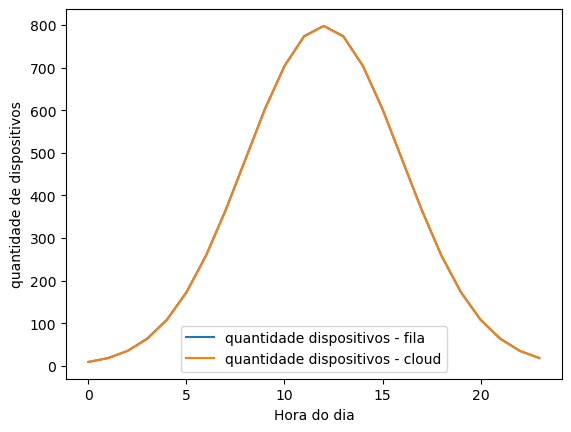

In [96]:
latency_list_fog_only_cloud = []
latency_list_cloud_only_cloud = []
all_devices_latency_mean_only_cloud = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    cloud_latency = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)


    media_priority_latency = latency_by_priority / num_priority
    
    media_cloud_latency = cloud_latency / num_standard
        
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_cloud.append(media_priority_latency)
    latency_list_cloud_only_cloud.append(media_cloud_latency)
    all_devices_latency_mean_only_cloud.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - cloud")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - fila', 'quantidade dispositivos - cloud'])
pl.show()

### Alocation - Only Fog

Hour:  0
Alocation process time:  0.00015470000016648555
Latencia media:  62.72354866724845
Hour:  1
Alocation process time:  0.0002754000001914392
Latencia media:  45.47692427797715
Hour:  2
Alocation process time:  0.0005282000001898268
Latencia media:  53.81374973139892
Hour:  3
Alocation process time:  0.000990300000012212
Latencia media:  54.53472973556876
Hour:  4
Alocation process time:  0.0016425999997409235
Latencia media:  51.320598309556054
Hour:  5
Alocation process time:  0.011040400000183581
Latencia media:  50.722364948651446
Hour:  6
Alocation process time:  0.08217400000012276
Latencia media:  48.79474854559915
Hour:  7
Alocation process time:  0.288964599999872
Latencia media:  34.692396598948186
Hour:  8
Alocation process time:  0.6436036999998578
Latencia media:  21.728844884649337
Hour:  9
Alocation process time:  1.135149199999887
Latencia media:  16.703060258325298
Hour:  10
Alocation process time:  1.7836333999998715
Latencia media:  13.130088537640242
Hour:  11

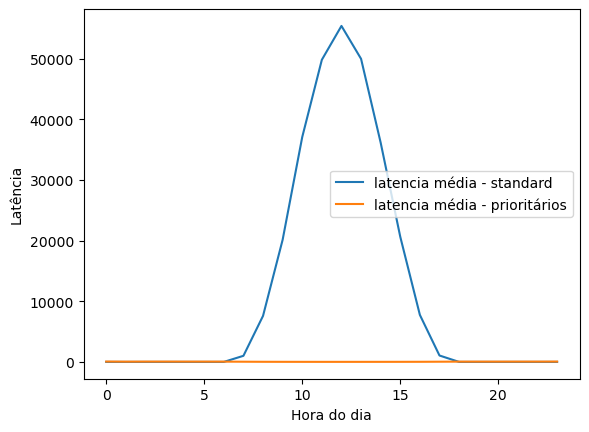

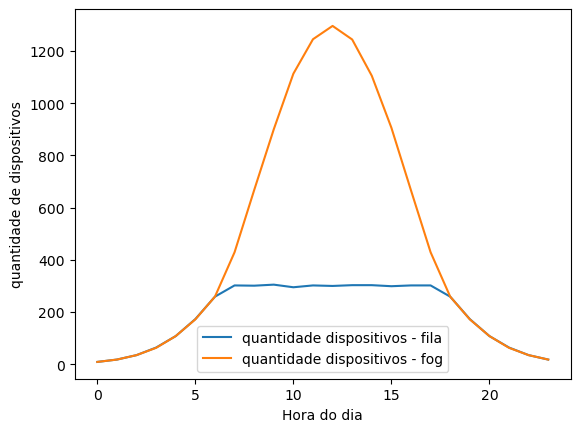

In [67]:
latency_list_fog_only_fog = []
latency_list_cloud_only_fog = []
all_devices_latency_mean_only_fog = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    if num_priority == 0:
        media_priority_latency = 0
    else:
        media_priority_latency = latency_by_priority / num_priority

    if num_standard == 0:
        media_cloud_latency = 0
    else:
        media_cloud_latency = cloud_latency / num_standard
    

    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_fog.append(media_priority_latency)
    latency_list_cloud_only_fog.append(media_cloud_latency)
    all_devices_latency_mean_only_fog.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - fila', 'quantidade dispositivos - fog'])
pl.show()

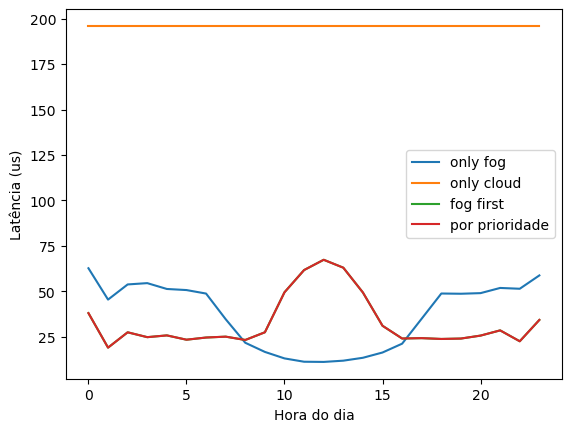

In [68]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por prioridade'])
pl.show()

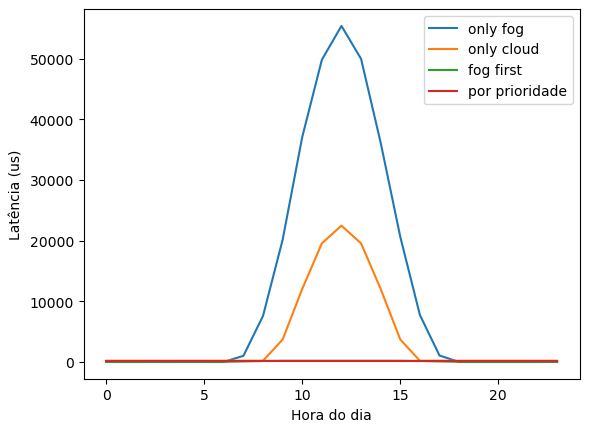

In [69]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por prioridade'])
pl.show()

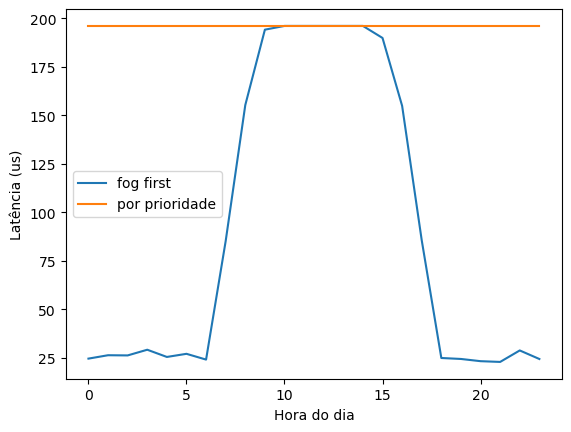

In [70]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por prioridade'])
pl.show()

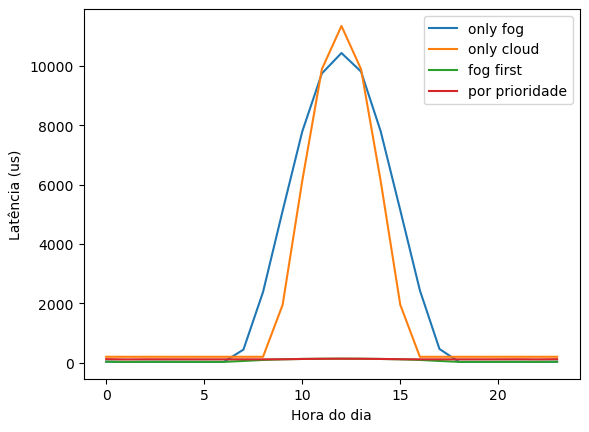

In [71]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por prioridade'])
pl.show()

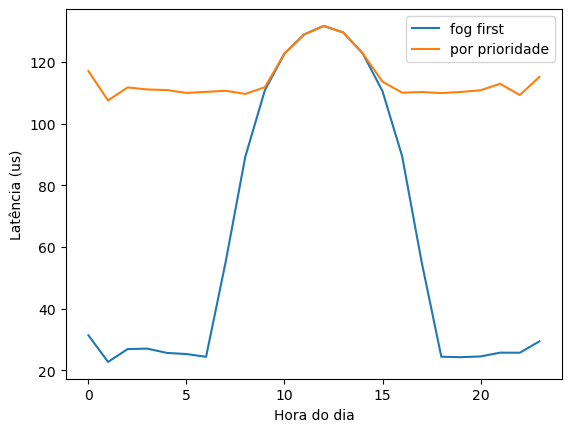

In [72]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por prioridade'])
pl.show()

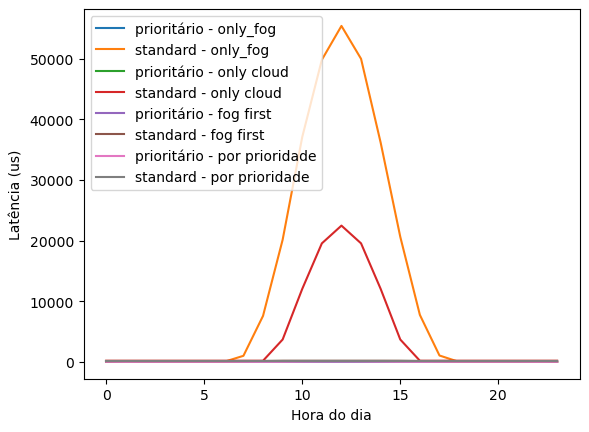

In [73]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por prioridade")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['prioritário - only_fog',
            'standard - only_fog',
            'prioritário - only cloud',
            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por prioridade',
            'standard - por prioridade'])
pl.show()

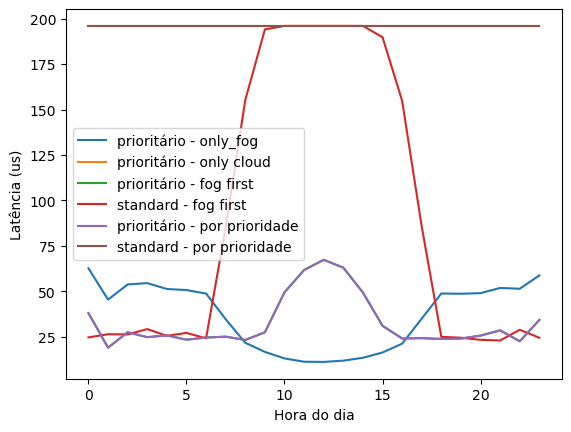

In [74]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por prioridade")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por prioridade")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['prioritário - only_fog',
#            'standard - only_fog',
            'prioritário - only cloud',
#            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por prioridade',
            'standard - por prioridade'])
pl.show()